In [1]:
%reload_ext autoreload
%autoreload 2

import h5py 
import numpy as np
import py21cmfast as p21c

import matplotlib as mpl
import matplotlib.pyplot as plt

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid', 'navy', 'brown'])


# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'CMU Serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['axes.labelpad'] = 9.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 1.
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

In [12]:
base_dir = '/n/holyscratch01/iaifi_lab/yitians/dm21cm/prod_outputs'
run_name = 'inhom_phot_m5e3_lt25'

fid_lc = p21c.LightCone.read(f'{base_dir}/{run_name}/LightCones/Lightcone_I0_D0.h5')

In [4]:
EoR_colour = mpl.colors.LinearSegmentedColormap.from_list(
    '',
    [
        (0.0, 'white'),
        (0.1, 'yellow'),
        (0.3, 'orange'),
        (0.4, 'red'),
        (0.6, 'black'),
        (0.8, 'blue'),
        (1.0, 'cyan')
    ]
)

In [13]:
datasets = []

for id in [[0,0],[1,0],[0,1],[1,1]]:
    i, d = id
    lightcone_example = h5py.File(f'{base_dir}/{run_name}/LightCones/Lightcone_I{i}_D{d}.h5')
    datasets.append(lightcone_example['lightcones']['brightness_temp'][:, 0, :])

z_s = np.copy(fid_lc.lightcone_redshifts)

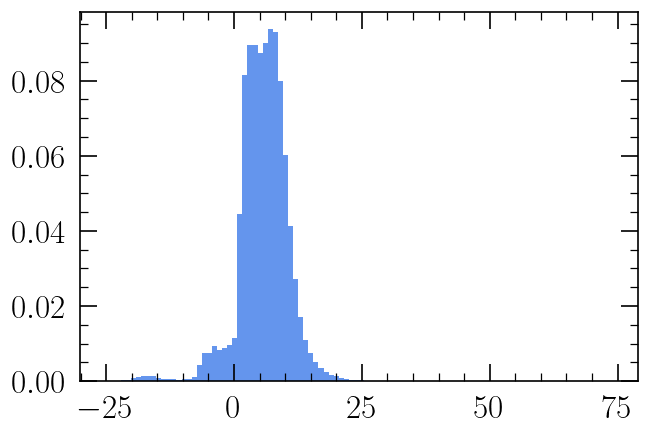

In [14]:
plt.hist(np.array((datasets)).flatten(), bins=100, density=True);

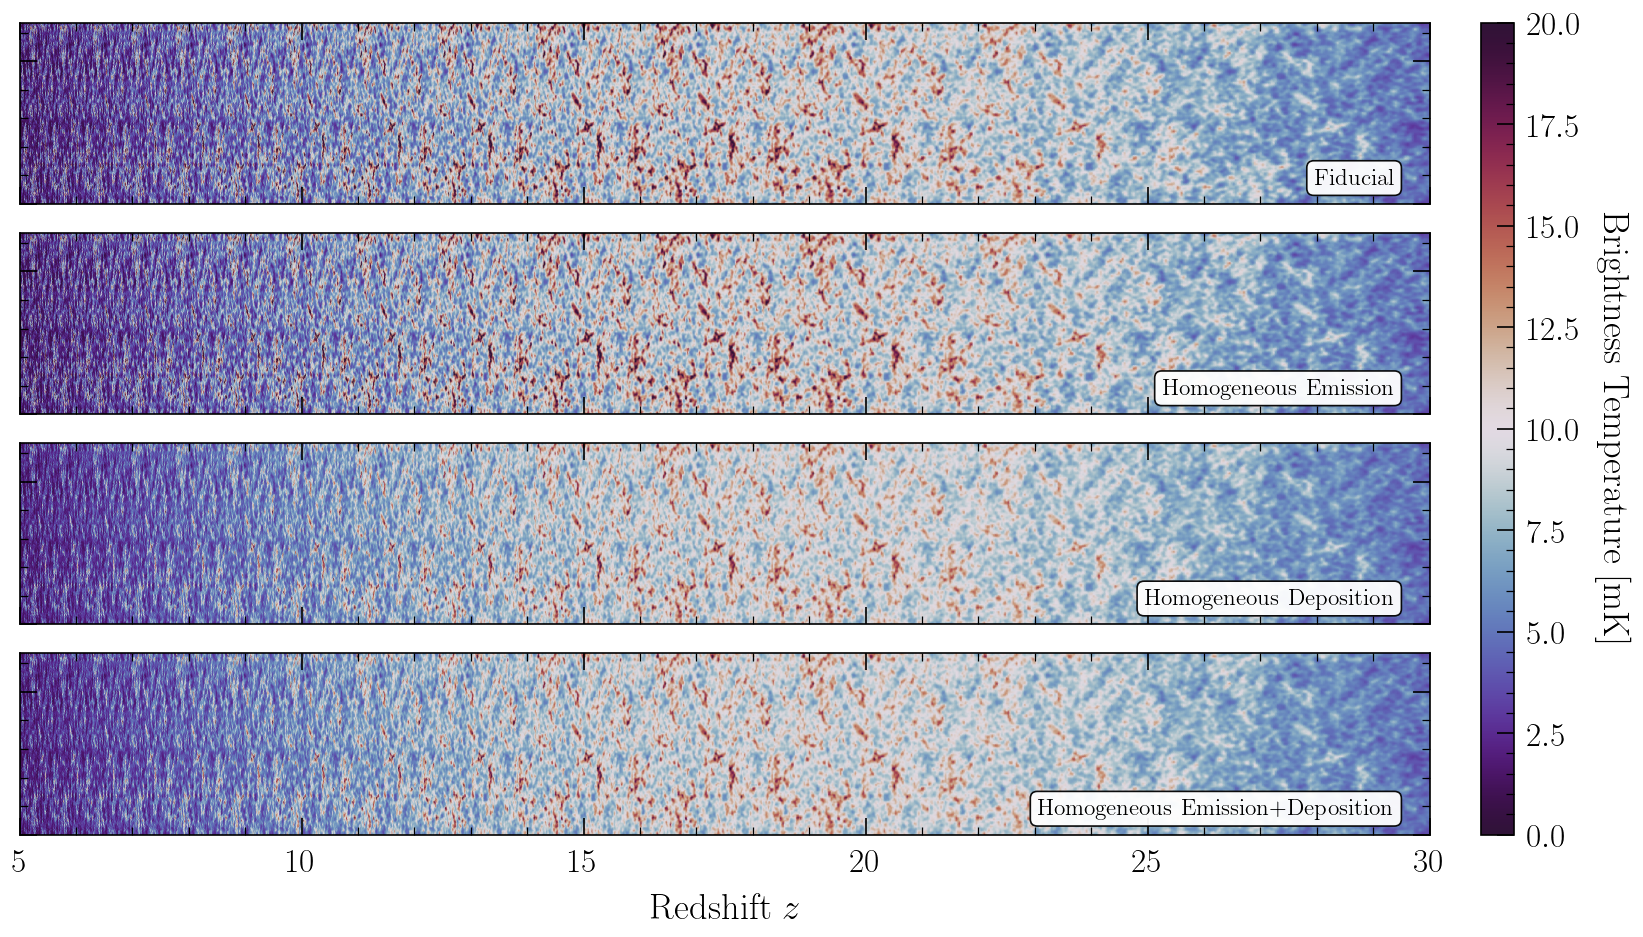

In [15]:
fig, axs = plt.subplots(nrows = 4, figsize = (15, 8))

EoR_colour = 'twilight_shifted'

im = axs[0].pcolormesh(z_s, np.arange(128), datasets[0], cmap=EoR_colour, vmin=0, vmax=20, shading='gouraud')

for i in range(1, 4):
    axs[i].pcolormesh(z_s, np.arange(128), datasets[i], vmin=im.properties()['clim'][0], vmax=im.properties()['clim'][1], cmap=EoR_colour, shading='gouraud')

for i in range(3):
    axs[i].set_xticklabels([])
for i in range(4):
    axs[i].set_yticklabels([])
    axs[i].set_xlim(5, 30)
    axs[0].set_xlabel('')
    
axs[-1].set_xlabel(r'Redshift $z$', fontsize = 22)

props = dict(boxstyle='round', facecolor='white', alpha=0.95)
axs[0].text(0.975, 0.2, 'Fiducial', transform=axs[0].transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='right', bbox=props)

axs[1].text(0.975, 0.2, 'Homogeneous Emission',
            transform=axs[1].transAxes, fontsize=14,
            verticalalignment='top', horizontalalignment='right', bbox=props)

axs[2].text(0.975, 0.2, 'Homogeneous Deposition',
            transform=axs[2].transAxes, fontsize=14,
            verticalalignment='top', horizontalalignment='right', bbox=props)

axs[3].text(0.975, 0.2, 'Homogeneous Emission+Deposition',
            transform=axs[3].transAxes, fontsize=14,
            verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
cbar = fig.colorbar(im, ax=axs.ravel().tolist(), aspect = 25, pad = 0.03)
cbar.set_label('Brightness Temperature [mK]', rotation = 270, labelpad = 30, fontsize = 22)
plt.savefig('LightConePlot.png', dpi=200)

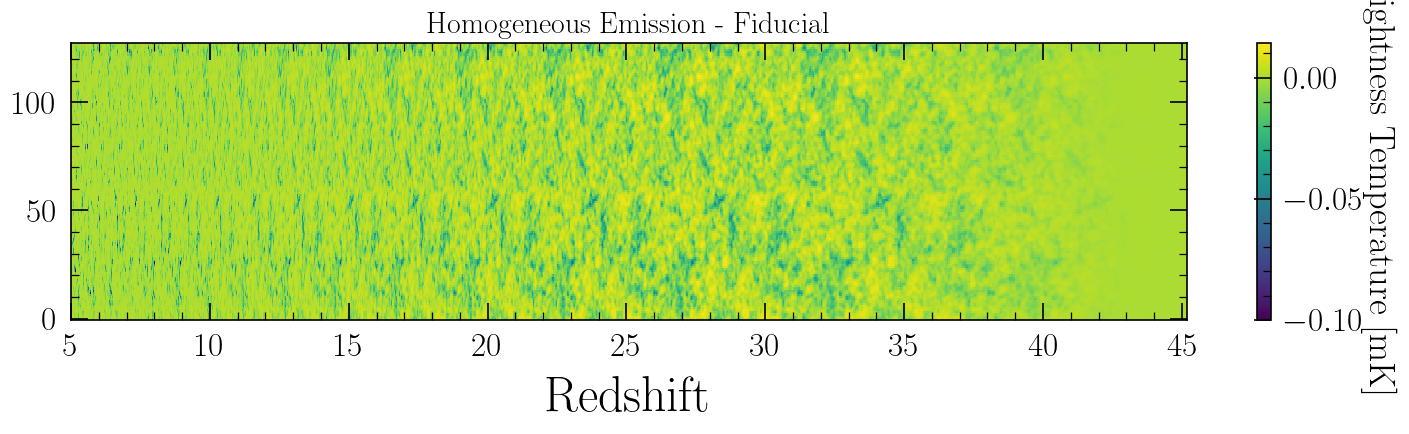

In [20]:
fig, axs = plt.subplots(figsize = (15, 3))
im = axs.pcolormesh(z_s, np.arange(128), datasets[1]-datasets[0], vmin=-0.1)
axs.set(title='Homogeneous Emission - Fiducial', xlabel='Redshift')
cbar = fig.colorbar(im, ax=axs)
cbar.set_label('Brightness Temperature [mK]', rotation = 270, labelpad = 20, fontsize = 22)

In [ ]:
x_e_box_s = []
for id in [[0,0],[1,0],[0,1],[1,1]]:
    i, d = id
    with h5py.File(f'{base_dir}/{run_name}/LightCones/Lightcone_I{i}_D{d}.h5') as hf:
        x_e_box_s.append(hf['lightcones']['x_e_box'][:,0,:])

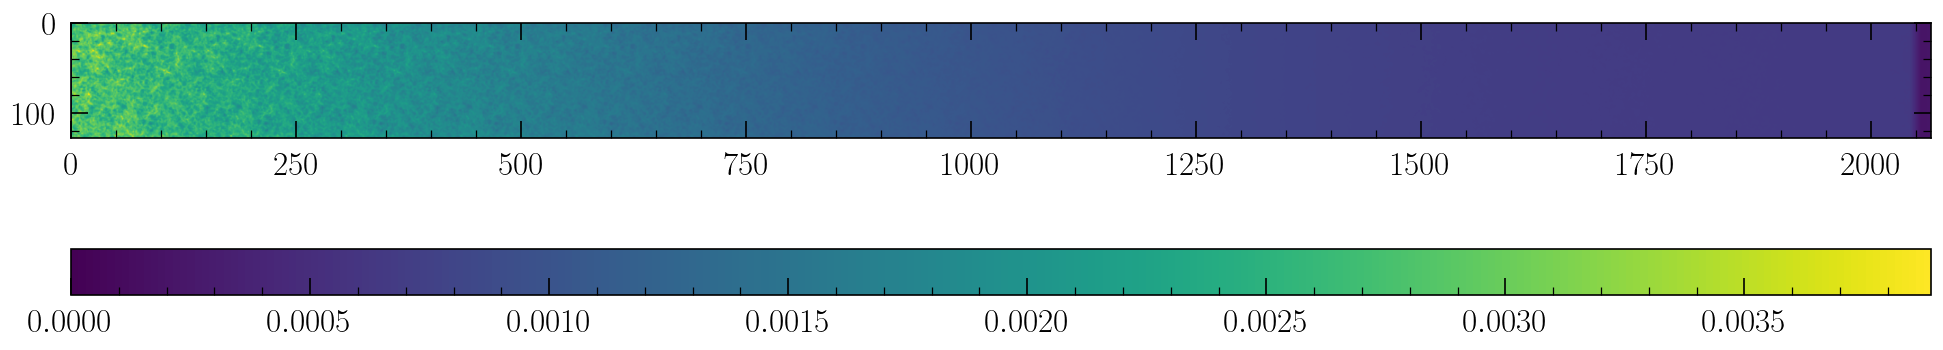

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(x_e_box_s[0])
plt.colorbar(orientation='horizontal', aspect=40)